[Consumo de combustible Canada 2000-2022](https://www.kaggle.com/datasets/ahmettyilmazz/fuel-consumption)

### Llamado de las librerías

In [4]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np


# Gestion de librerias
# ==============================================================================
from importlib import reload


# Matemáticas y estadísticas
# ==============================================================================
import math

# Preparación de datos
# ==============================================================================
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

from funciones import multiple_plot

### Cargue del dataset

In [5]:
df = pd.read_csv('3_Fuel_Consumption_2000-2022.csv')

In [6]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


### Quitar espacios de columna tipo objeto

In [7]:
df['MAKE'] = df['MAKE'].str.strip()
df['MODEL'] = df['MODEL'].str.strip()
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].str.strip()
df['TRANSMISSION'] = df['TRANSMISSION'].str.strip()
df['FUEL'] = df['FUEL'].str.strip()

### MillasxGalon a KmxGalon

In [8]:
df['COMB (mpg)'] = df['COMB (mpg)'] * 1.60934
df.rename(columns={'COMB (mpg)': 'KMXGALON'}, inplace=True)

### Eliminar duplicados

In [9]:
df.loc[df.duplicated()]
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)

### Visualización categoricos

In [10]:
catCols = df.select_dtypes(include = ["object", 'category']).columns.tolist()
df[catCols].head()

,MAKE,MODEL,VEHICLE CLASS,TRANSMISSION,FUEL
0,ACURA,1.6EL,COMPACT,A4,X
1,ACURA,1.6EL,COMPACT,M5,X
2,ACURA,3.2TL,MID-SIZE,AS5,Z
3,ACURA,3.5RL,MID-SIZE,A4,Z
4,ACURA,INTEGRA,SUBCOMPACT,A4,X


In [11]:
for col in catCols:
    print("="*5 + f" {col} " + "="*20)
    print(df[col].value_counts())
    print()

===== MAKE ====================
MAKE
CHEVROLET        1725
BMW              1490
GMC              1357
FORD             1276
MERCEDES-BENZ     935
                 ... 
ALFA ROMEO          8
SRT                 4
GENESIS             4
BUGATTI             3
PLYMOUTH            2
Name: count, Length: 87, dtype: int64

===== MODEL ====================
MODEL
JETTA                        89
MUSTANG                      88
RANGER                       61
SENTRA                       58
ALTIMA                       57
                             ..
NX 350 AWD                    1
Taos                          1
Tundra Hybrid 4WD TRD PRO     1
Tundra Hybrid 4WD             1
Tundra 4WD TRD                1
Name: count, Length: 4229, dtype: int64

===== VEHICLE CLASS ====================
VEHICLE CLASS
SUV                         2639
COMPACT                     2636
MID-SIZE                    2300
PICKUP TRUCK - STANDARD     1689
SUBCOMPACT                  1559
FULL-SIZE                   10

In [12]:
df.drop(['TRANSMISSION','MODEL'], axis='columns', inplace=True)

In [13]:
df.loc[df.duplicated()]
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)

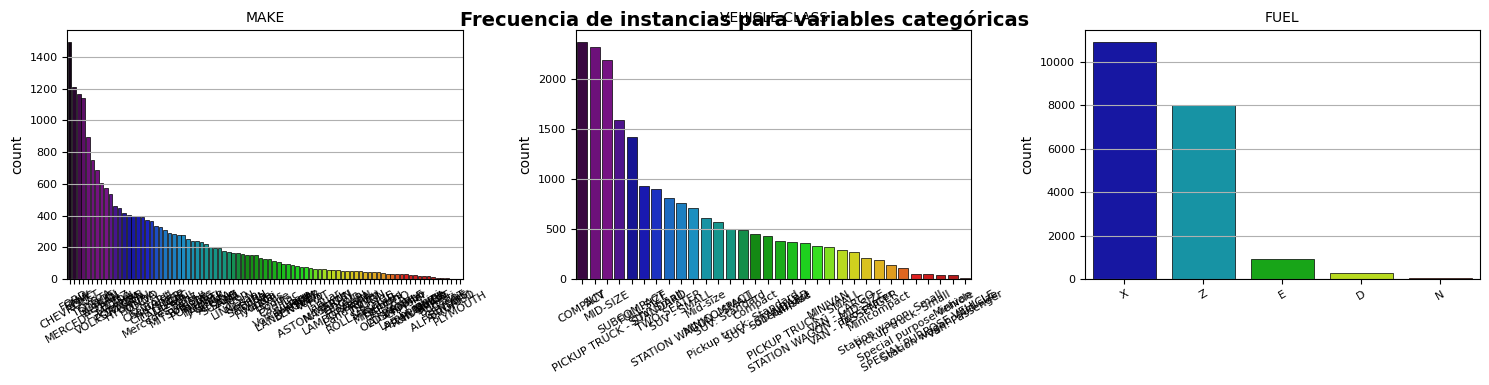

In [14]:
catCols = df.select_dtypes(include = ["object", 'category']).columns.tolist()
df[catCols].head(2)
multiple_plot(3, df , catCols, None, 'countplot', 'Frecuencia de instancias para variables categóricas',30)

Text(0.5, 1.1, 'Distribución de la variable Make vs. EMISSIONS')

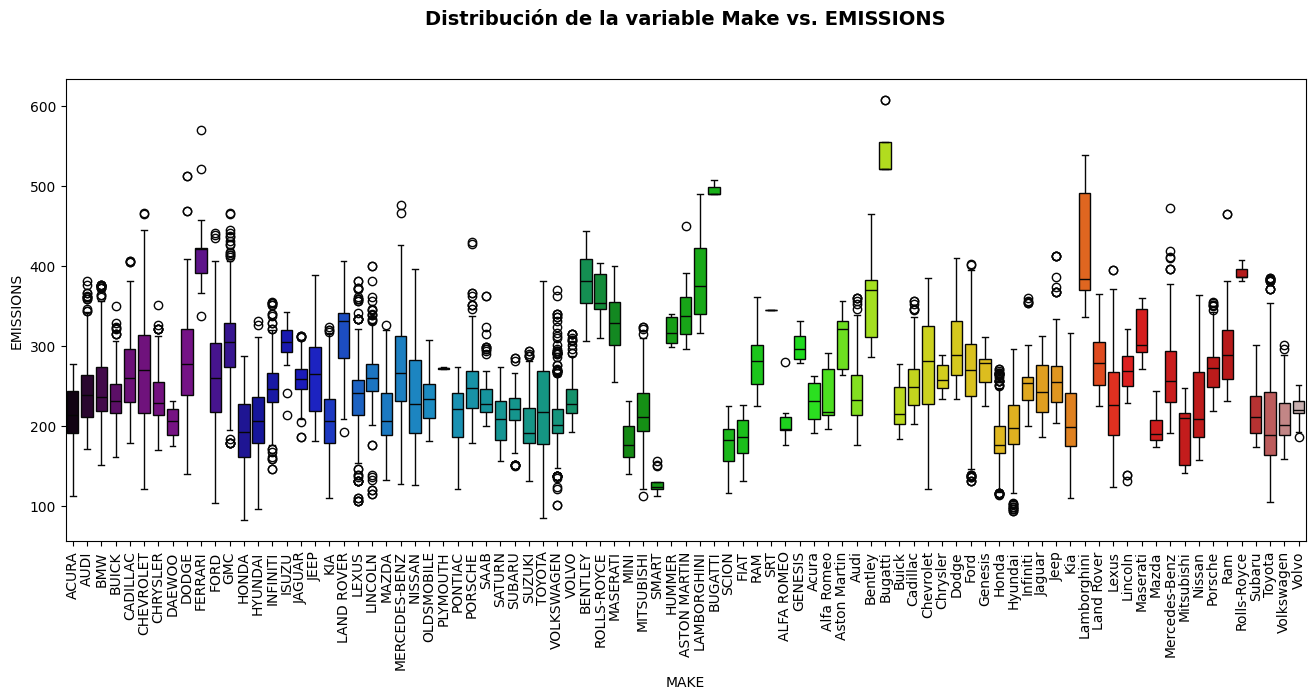

In [15]:
fig, axes = plt.subplots(1, 1, figsize=(16, 6))
ax_cond = axes
sns.boxplot(data=df,
            x='MAKE',
            y='EMISSIONS',
            ax=axes,
            palette='nipy_spectral',
            zorder=1
            )
# Personalizar el eje x
ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=90)
# Configurar título
ax_cond.set_title('Distribución de la variable Make vs. EMISSIONS', fontsize=14, fontweight="bold", y=1.1)

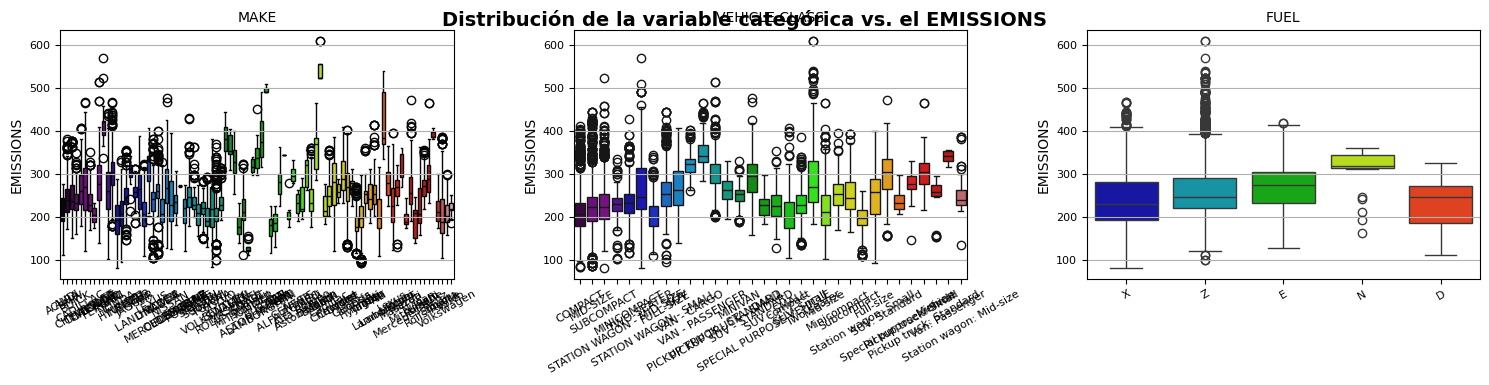

In [16]:
multiple_plot(3, df , catCols, 'EMISSIONS', 'boxplot', 'Distribución de la variable categórica vs. el EMISSIONS',30)

### Visualización númericos

In [17]:
df.drop(['HWY (L/100 km)','COMB (L/100 km)'], axis='columns', inplace=True)

In [18]:
df.loc[df.duplicated()]
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)

In [19]:
numCols=df.select_dtypes(include = ['float64','int32','int64']).columns.tolist()
df[numCols].head()

,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,KMXGALON,EMISSIONS
0,2000,1.6,4,9.2,56.32690,186
1,2000,1.6,4,8.5,59.54558,175
2,2000,3.2,6,12.2,45.06152,230
3,2000,3.5,6,13.4,40.23350,264
4,2000,1.8,4,10.0,53.10822,198


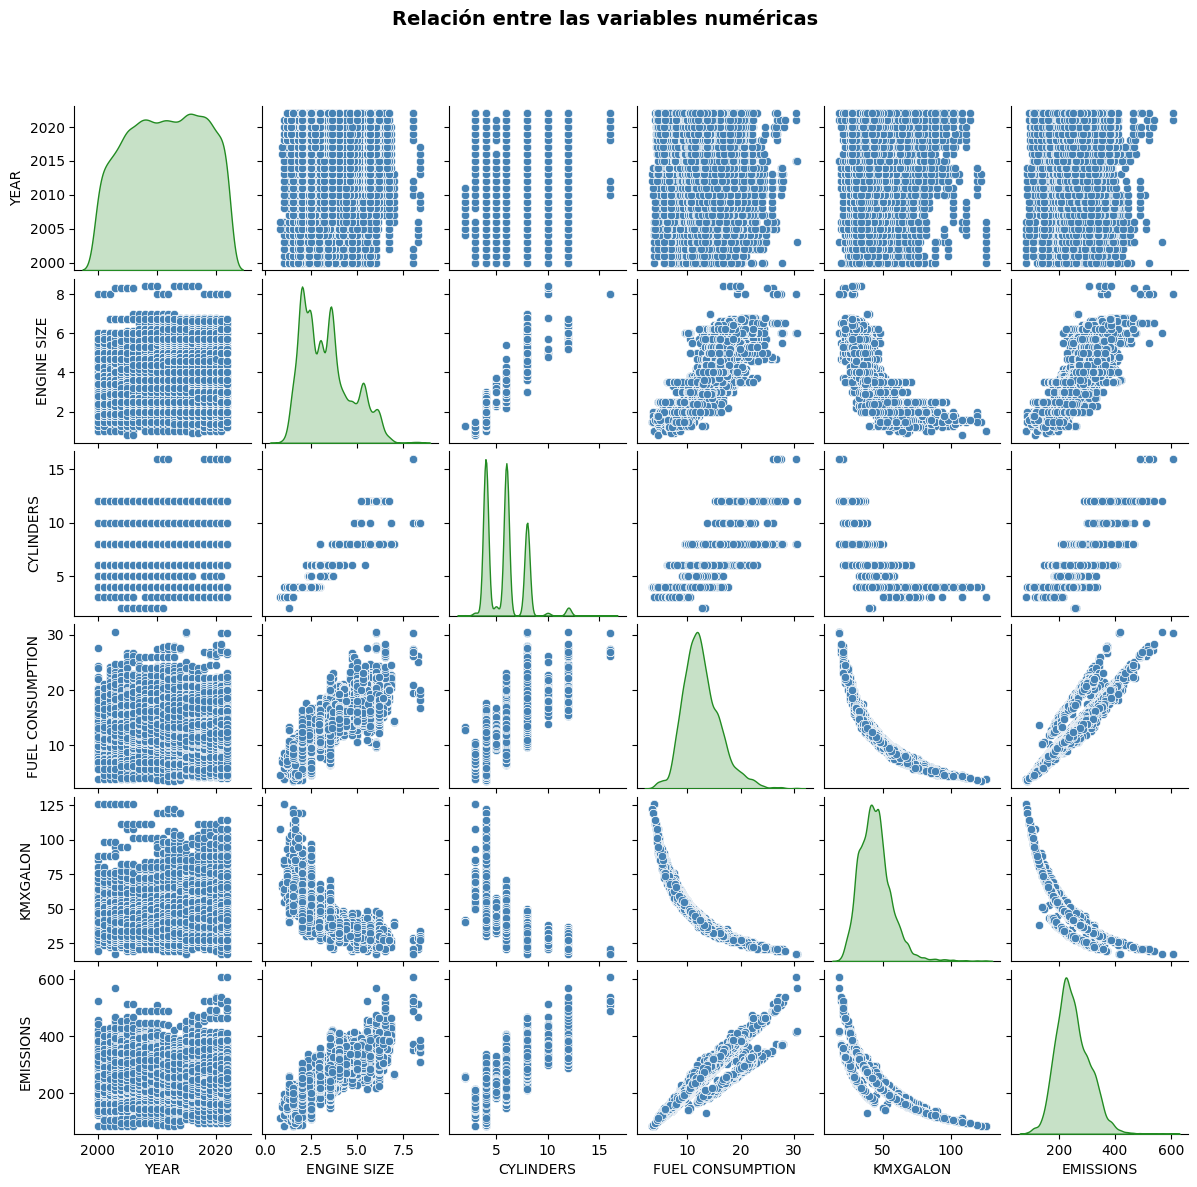

In [20]:
#Visualización de variables numéricas con respecto al precio
multiple_plot(1, df , numCols, None, 'scatterplot', 'Relación entre las variables numéricas',30)

### Variable de salida

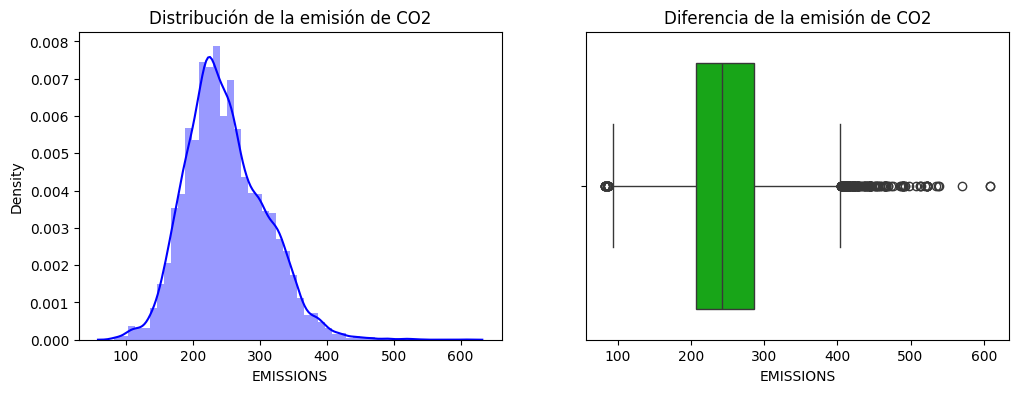

In [21]:
#Histográma y caja de bigotes del precio de los vehículos

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Distribución de la emisión de CO2')
sns.distplot(df['EMISSIONS'], color='blue')

plt.subplot(1,2,2)
plt.title('Diferencia de la emisión de CO2')
sns.boxplot(x=df['EMISSIONS'], color='blue', palette='nipy_spectral')

plt.show()

### Valores atipicos

#### Variable de salida

In [22]:
#Calculo de valores atípicos


#Calculo de Q1 t Q3
Q1 = np.percentile(df['EMISSIONS'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['EMISSIONS'], 75, interpolation = 'midpoint')

#Cálculo del rango intercuartil
IQR = Q3 - Q1

#Cálculo de valor mínimo y máximo para los valores atípicos
VAInf = Q1 - 1.5*IQR
VASup = Q3 + 1.5*IQR

print(f'Valor atípico leve inferior:{VAInf}')
print(f'Valor atípico leve superior:{VASup}')


Valor atípico leve inferior:88.5
Valor atípico leve superior:404.5


In [23]:
# Se eliminan los valores atípicos
df = df.drop(df[df['EMISSIONS']>VASup].index)

df = df.drop(df[df['EMISSIONS']<VAInf].index)

#Reiniciar el indice
df.reset_index(drop=True, inplace=True)

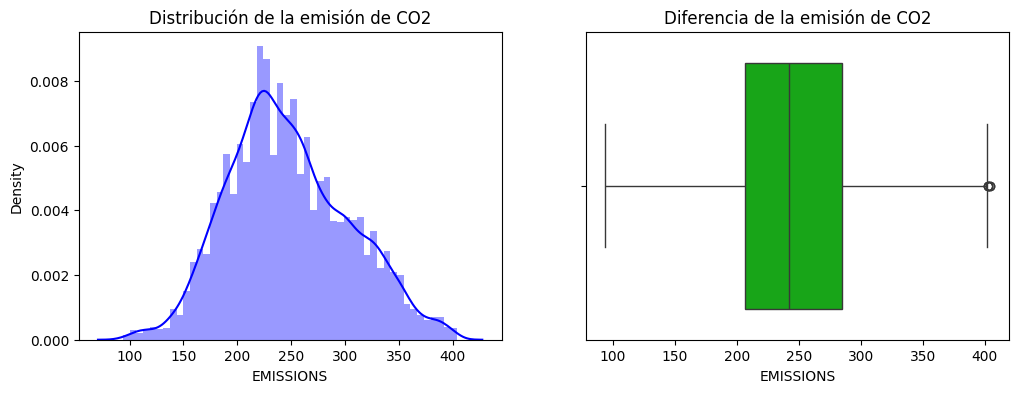

In [24]:
#Histográma y caja de bigotes del precio de los vehículos

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Distribución de la emisión de CO2')
sns.distplot(df['EMISSIONS'], color='blue')

plt.subplot(1,2,2)
plt.title('Diferencia de la emisión de CO2')
sns.boxplot(x=df['EMISSIONS'], color='blue', palette='nipy_spectral')

plt.show()

#### Variables de entrtada

In [25]:
#utilización de LocalOutlierFactor con 13 vecinos para identificar valores atípicos en las variables de entrada


# crear un objeto LocalOutlierFactor con n_neighbors=13
lof = LocalOutlierFactor(n_neighbors=13, contamination=0.1)

# identificar los valores atípicos por medio de lof
y_pred = lof.fit_predict(df[numCols])

# Identificar los índices de los valores atípicos
outliers = y_pred == -1

print('Indices de valores atípicos: ', df[outliers].index.tolist())
df = df.loc[~outliers]


Indices de valores atípicos:  [0, 2, 15, 43, 53, 72, 74, 80, 81, 83, 85, 87, 105, 107, 111, 122, 130, 131, 137, 141, 150, 157, 164, 178, 182, 185, 190, 198, 208, 213, 222, 224, 251, 269, 277, 288, 293, 294, 297, 312, 323, 328, 331, 334, 335, 340, 341, 346, 348, 353, 370, 375, 379, 381, 382, 383, 389, 392, 395, 402, 408, 412, 421, 425, 427, 428, 430, 438, 439, 441, 450, 451, 454, 457, 476, 479, 492, 494, 500, 510, 515, 519, 521, 527, 529, 531, 532, 544, 568, 569, 570, 571, 578, 586, 588, 594, 599, 618, 648, 662, 663, 665, 679, 686, 687, 692, 693, 699, 705, 718, 720, 733, 762, 775, 784, 794, 797, 798, 802, 805, 810, 828, 847, 849, 861, 871, 879, 893, 895, 897, 942, 943, 948, 951, 954, 955, 968, 976, 999, 1009, 1011, 1015, 1017, 1019, 1020, 1057, 1058, 1062, 1080, 1129, 1134, 1158, 1159, 1164, 1166, 1169, 1222, 1237, 1314, 1322, 1325, 1326, 1330, 1336, 1338, 1352, 1353, 1355, 1356, 1364, 1365, 1367, 1384, 1392, 1413, 1421, 1437, 1439, 1441, 1444, 1445, 1449, 1450, 1453, 1472, 1480, 1481, 

### Se hace verificación de datos nan

In [26]:
for col in df[numCols]:
    print (col, np.sum(pd.isnull(df[col])))

YEAR 0
ENGINE SIZE 0
CYLINDERS 0
FUEL CONSUMPTION 0
KMXGALON 0
EMISSIONS 0


In [27]:
for col in df[catCols]:
    print (col, np.sum(pd.isnull(df[col])))

MAKE 0
VEHICLE CLASS 0
FUEL 0


### Agrupamiento clase de vehiculos

In [28]:
df.groupby('VEHICLE CLASS').size().sort_values(ascending=False)

VEHICLE CLASS
COMPACT                     2143
SUV                         2063
MID-SIZE                    1867
PICKUP TRUCK - STANDARD     1405
SUBCOMPACT                  1244
SUV: Small                   812
FULL-SIZE                    803
SUV - SMALL                  682
STATION WAGON - SMALL        663
TWO-SEATER                   644
Mid-size                     561
MINICOMPACT                  522
SUV: Standard                453
Pickup truck: Standard       434
Compact                      409
SUV - STANDARD               391
Subcompact                   351
Full-size                    329
MINIVAN                      299
STATION WAGON - MID-SIZE     297
PICKUP TRUCK - SMALL         288
VAN - CARGO                  260
VAN - PASSENGER              224
Two-seater                   170
Minicompact                  162
Station wagon: Small         128
Pickup truck: Small           89
SPECIAL PURPOSE VEHICLE       44
Special purpose vehicle       44
Station wagon: Mid-size      

In [29]:
# Diccionario con los reemplazos a realizar
vehicle_class_reemplazos = {
    # SEDAN_COMPACT
    'COMPACT': 'SEDAN_COMPACT',
    'Compact': 'SEDAN_COMPACT',
    'SUBCOMPACT': 'SEDAN_COMPACT',
    'Subcompact': 'SEDAN_COMPACT',
    'MINICOMPACT': 'SEDAN_COMPACT',
    'Minicompact': 'SEDAN_COMPACT',
    'TWO-SEATER': 'SEDAN_COMPACT',
    'Two-seater': 'SEDAN_COMPACT',
    
    # SUV_CROSSOVER
    'SUV': 'SUV_CROSSOVER',
    'SUV: Small': 'SUV_CROSSOVER',
    'SUV - SMALL': 'SUV_CROSSOVER',
    'SUV: Standard': 'SUV_CROSSOVER',
    'SUV - STANDARD': 'SUV_CROSSOVER',
    
    # MIDSIZE_FULLSIZE
    'MID-SIZE': 'MIDSIZE_FULLSIZE',
    'Mid-size': 'MIDSIZE_FULLSIZE',
    'FULL-SIZE': 'MIDSIZE_FULLSIZE',
    'Full-size': 'MIDSIZE_FULLSIZE',
    
    # TRUCK_VAN
    'PICKUP TRUCK - STANDARD': 'TRUCK_VAN',
    'Pickup truck: Standard': 'TRUCK_VAN',
    'PICKUP TRUCK - SMALL': 'TRUCK_VAN',
    'Pickup truck: Small': 'TRUCK_VAN',
    'VAN - CARGO': 'TRUCK_VAN',
    'VAN - PASSENGER': 'TRUCK_VAN',
    'Van: Passenger': 'TRUCK_VAN',
    'MINIVAN': 'TRUCK_VAN',
    'Minivan': 'TRUCK_VAN',
    
    # WAGON_SPECIALTY
    'STATION WAGON - SMALL': 'WAGON_SPECIALTY',
    'Station wagon: Small': 'WAGON_SPECIALTY',
    'STATION WAGON - MID-SIZE': 'WAGON_SPECIALTY',
    'Station wagon: Mid-size': 'WAGON_SPECIALTY',
    'SPECIAL PURPOSE VEHICLE': 'WAGON_SPECIALTY',
    'Special purpose vehicle': 'WAGON_SPECIALTY'
}

# Se reemplazan los valores de acuerdo con el diccionario creado anteriormente
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].map(vehicle_class_reemplazos).fillna(df['VEHICLE CLASS'])

# Visualización de los nuevos valores agrupados para la categoría 'VEHICLE CLASS'
df['VEHICLE CLASS'].value_counts().sort_values(ascending=False)

VEHICLE CLASS
SEDAN_COMPACT       5645
SUV_CROSSOVER       4401
MIDSIZE_FULLSIZE    3560
TRUCK_VAN           3045
WAGON_SPECIALTY     1216
Name: count, dtype: int64

In [30]:
# Diccionario con los reemplazos a realizar
fuel_reemplazos = {
    #O: Otros
    'E': 'O',
    'D': 'O',
    'N': 'O'}

# Se reemplazan los valores de acuerdo con el diccionario creado anteriormente
df['FUEL'] = df['FUEL'].map(fuel_reemplazos).fillna(df['FUEL'])

# Visualización de los nuevos valores agrupados para la categoría 'FUEL'
df['FUEL'].value_counts().sort_values(ascending=False)

FUEL
X    10004
Z     6973
O      890
Name: count, dtype: int64

In [31]:
df.groupby('MAKE').size().sort_values(ascending=False)

MAKE
CHEVROLET        1309
FORD             1091
BMW              1034
GMC              1009
MERCEDES-BENZ     746
                 ... 
ALFA ROMEO          7
SMART               6
GENESIS             4
SRT                 2
PLYMOUTH            1
Length: 85, dtype: int64

In [32]:
# Diccionario con los reemplazos a realizar
make_reemplazos = {
    # HIGH_RANGE (Marcas de lujo/premium)
    'MERCEDES-BENZ': 'HIGH_RANGE',
    'Mercedes-Benz': 'HIGH_RANGE',
    'BMW': 'HIGH_RANGE',
    'AUDI': 'HIGH_RANGE',
    'Audi': 'HIGH_RANGE',
    'PORSCHE': 'HIGH_RANGE',
    'Porsche': 'HIGH_RANGE',
    'LEXUS': 'HIGH_RANGE',
    'Lexus': 'HIGH_RANGE',
    'CADILLAC': 'HIGH_RANGE',
    'Cadillac': 'HIGH_RANGE',
    'INFINITI': 'HIGH_RANGE',
    'Infiniti': 'HIGH_RANGE',
    'ACURA': 'HIGH_RANGE',
    'LINCOLN': 'HIGH_RANGE',
    'Lincoln': 'HIGH_RANGE',
    'JAGUAR': 'HIGH_RANGE',
    'Jaguar': 'HIGH_RANGE',
    'LAND ROVER': 'HIGH_RANGE',
    'Land Rover': 'HIGH_RANGE',
    'MASERATI': 'HIGH_RANGE',
    'Maserati': 'HIGH_RANGE',
    'BENTLEY': 'HIGH_RANGE',
    'Bentley': 'HIGH_RANGE',
    'ASTON MARTIN': 'HIGH_RANGE',
    'Aston Martin': 'HIGH_RANGE',
    'LAMBORGHINI': 'HIGH_RANGE',
    'ROLLS-ROYCE': 'HIGH_RANGE',
    'Rolls-Royce': 'HIGH_RANGE',
    'ALFA ROMEO': 'HIGH_RANGE',
    'Alfa Romeo': 'HIGH_RANGE',
    'GENESIS': 'HIGH_RANGE',
    'Genesis': 'HIGH_RANGE',
    'FERRARI': 'HIGH_RANGE',
    'Ferrari': 'HIGH_RANGE',
    'Lamborghini': 'HIGH_RANGE',
    
    # MID_RANGE (Marcas mainstream/populares)
    'CHEVROLET': 'MID_RANGE',
    'Chevrolet': 'MID_RANGE',
    'FORD': 'MID_RANGE',
    'Ford': 'MID_RANGE',
    'TOYOTA': 'MID_RANGE',
    'Toyota': 'MID_RANGE',
    'GMC': 'MID_RANGE',
    'DODGE': 'MID_RANGE',
    'Dodge': 'MID_RANGE',
    'NISSAN': 'MID_RANGE',
    'Nissan': 'MID_RANGE',
    'VOLKSWAGEN': 'MID_RANGE',
    'Volkswagen': 'MID_RANGE',
    'MAZDA': 'MID_RANGE',
    'Mazda': 'MID_RANGE',
    'HYUNDAI': 'MID_RANGE',
    'Hyundai': 'MID_RANGE',
    'HONDA': 'MID_RANGE',
    'Honda': 'MID_RANGE',
    'SUBARU': 'MID_RANGE',
    'Subaru': 'MID_RANGE',
    'JEEP': 'MID_RANGE',
    'Jeep': 'MID_RANGE',
    'CHRYSLER': 'MID_RANGE',
    'Chrysler': 'MID_RANGE',
    'MITSUBISHI': 'MID_RANGE',
    'Mitsubishi': 'MID_RANGE',
    'BUICK': 'MID_RANGE',
    'Buick': 'MID_RANGE',
    'PONTIAC': 'MID_RANGE',
    'VOLVO': 'MID_RANGE',
    'Volvo': 'MID_RANGE',
    'MINI': 'MID_RANGE',
    'KIA': 'MID_RANGE',
    'RAM': 'MID_RANGE',
    'Ram': 'MID_RANGE',
    'SATURN': 'MID_RANGE',
    'Kia': 'MID_RANGE',
    
    
    # LOW_RANGE (Marcas económicas/básicas)
    'SUZUKI': 'LOW_RANGE',
    'SAAB': 'LOW_RANGE',
    'FIAT': 'LOW_RANGE',
    'SCION': 'LOW_RANGE',
    'DAEWOO': 'LOW_RANGE',
    'ISUZU': 'LOW_RANGE',
    'HUMMER': 'LOW_RANGE',
    'SMART': 'LOW_RANGE',
    'SRT': 'LOW_RANGE',
    'PLYMOUTH': 'LOW_RANGE',
    'OLDSMOBILE': 'LOW_RANGE',
    'Acura': 'LOW_RANGE'  # Este parece ser un error en los datos, normalmente Acura es premium
}

# Se reemplazan los valores de acuerdo con el diccionario creado anteriormente
df['MAKE'] = df['MAKE'].map(make_reemplazos).fillna(df['MAKE'])
df = df.rename(columns={'MAKE': 'RANGE_CATEGORY'})

# Visualización de los nuevos valores agrupados para la categoría 'RANGE_CATEGORY'
df['RANGE_CATEGORY'].value_counts().sort_values(ascending=False)

RANGE_CATEGORY
MID_RANGE     11770
HIGH_RANGE     5503
LOW_RANGE       594
Name: count, dtype: int64

In [33]:
df.loc[df.duplicated()]
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)

In [34]:
df.head()

,YEAR,RANGE_CATEGORY,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,FUEL,FUEL CONSUMPTION,KMXGALON,EMISSIONS
0,2000,HIGH_RANGE,SEDAN_COMPACT,1.6,4,X,8.5,59.54558,175
1,2000,HIGH_RANGE,MIDSIZE_FULLSIZE,3.5,6,Z,13.4,40.23350,264
2,2000,HIGH_RANGE,SEDAN_COMPACT,1.8,4,X,10.0,53.10822,198
3,2000,HIGH_RANGE,SEDAN_COMPACT,1.8,4,X,9.3,54.71756,189
4,2000,HIGH_RANGE,SEDAN_COMPACT,1.8,4,Z,9.4,54.71756,191


In [35]:
# Porcentaje de filas para la primera parte (por ejemplo, 90%)
percentage_first_part = 0.90

# Número de filas para la primera parte
n_rows_part1 = int(len(df) * percentage_first_part)

# Obtener índices aleatorios para la primer parte
indices_part1 = df.sample(n=n_rows_part1, random_state=123).index

# Obtener índices para la segunda parte (resto de las filas)
indices_part2 = df.index.difference(indices_part1)

# Dividir el DataFrame en dos partes
df_f = df.loc[indices_part1]
dp_p = df.loc[indices_part2]

In [36]:
# Exportamos el dataframe a un archivo CSV
df_f.to_csv('3_Fuel_Consumption_2000-2022_Prep.csv', index=False)
dp_p.to_csv('3_Fuel_Consumption_2000-2022_Prue.csv', index=False)